In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import random
import glob
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [18]:
print(len('/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled'))

59


In [19]:
root_path = '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/'

In [20]:
folders = glob('/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/*')
len(folders)

5749

In [21]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-ek2l1rpu
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-ek2l1rpu
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8310 sha256=5efc5d3d87776e21538312edfc2fd1fc3f271a4f2b6de617a3677632331062e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-io75y3kw/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [22]:
from keras_vggface.vggface import VGGFace
from keras.engine import  Model
from keras.layers import Input

In [23]:
vgg = VGGFace(include_top=False, weights='vggface',input_tensor=None, input_shape=[224, 224, 3]) 

58916864/58909280 [==============================] - 1s 0us/step


In [24]:
for layer in vgg.layers:
  layer.trainable = False

In [25]:
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [26]:
model = Model(inputs=vgg.input, outputs=prediction)

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0   

In [91]:
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model


In [96]:
input = Input(shape =(224,224,3))

# 1st Conv Block

x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 3rd Conv block  
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

# Fully connected layers  
x = Flatten()(x) 
x = Dense(units = 4096, activation ='relu')(x) 
x = Dense(units = 4096, activation ='relu')(x) 
output = Dense(units = 5749, activation ='softmax')(x)

In [97]:
model1 = Model (inputs=input, outputs =output)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_263 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_265 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_266 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 56, 56, 128)       0   

In [98]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [44]:
import os
import random
from shutil import copyfile

def img_train_test_split(img_source_dir, train_size):
    """
    Randomly splits images over a train and validation folder, while preserving the folder structure
    
    Parameters
    ----------
    img_source_dir : string
        Path to the folder with the images to be split. Can be absolute or relative path   
        
    train_size : float
        Proportion of the original images that need to be copied in the subdirectory in the train folder
    """    
    if not (isinstance(img_source_dir, str)):
        raise AttributeError('img_source_dir must be a string')
        
    if not os.path.exists(img_source_dir):
        raise OSError('img_source_dir does not exist')
        
    if not (isinstance(train_size, float)):
        raise AttributeError('train_size must be a float')
        
    # Set up empty folder structure if not exists
    if not os.path.exists('data'):
        os.makedirs('data')
    else:
        if not os.path.exists('data/train'):
            os.makedirs('data/train')
        if not os.path.exists('data/validation'):
            os.makedirs('data/validation')
            
    # Get the subdirectories in the main image folder
    subdirs = [subdir for subdir in os.listdir(img_source_dir) if os.path.isdir(os.path.join(img_source_dir, subdir))]

    for subdir in subdirs:
        subdir_fullpath = os.path.join(img_source_dir, subdir)
        if len(os.listdir(subdir_fullpath)) == 0:
            print(subdir_fullpath + ' is empty')
            break

        train_subdir = os.path.join('data/train', subdir)
        validation_subdir = os.path.join('data/validation', subdir)

        # Create subdirectories in train and validation folders
        if not os.path.exists(train_subdir):
            os.makedirs(train_subdir)

        if not os.path.exists(validation_subdir):
            os.makedirs(validation_subdir)

        train_counter = 0
        validation_counter = 0

        # Randomly assign an image to train or validation folder
        for filename in os.listdir(subdir_fullpath):
            if filename.endswith(".jpg") or filename.endswith(".png"): 
                fileparts = filename.split('.')

                if random.uniform(0, 1) <= train_size:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir, str(train_counter) + '.' + fileparts[1]))
                    train_counter += 1
                else:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(validation_subdir, str(validation_counter) + '.' + fileparts[1]))
                    validation_counter += 1
                    


In [45]:
img_train_test_split(root_path, train_size=0.7)

In [46]:
train = glob('data/train/*')
print(len(train))
validation = glob('data/validation/*')
print(len(validation))

5749
5749


In [47]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('data/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

Found 9250 images belonging to 5749 classes.
Found 3983 images belonging to 5749 classes.


In [115]:
r = model2.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
)

Epoch 1/15


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,10] and labels shape [183968]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-115-453ae5931342>:6) ]] [Op:__inference_train_function_69015]

Function call stack:
train_function


In [112]:
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def identity_block(x, filter):
    
    # copy tensor to variable called x_skip
    x_skip = x
    
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

In [124]:
def ResNet34(shape = (224, 224, 3), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(5749, activation = 'softmax')(x)
    model2 = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model2

In [125]:
model2 = ResNet34()
model2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_5 (ZeroPadding2D (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_421 (Conv2D)             (None, 115, 115, 64) 9472        zero_padding2d_5[0][0]           
__________________________________________________________________________________________________
batch_normalization_211 (BatchN (None, 115, 115, 64) 256         conv2d_421[0][0]                 
___________________________________________________________________________________________

In [126]:
r = model2.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
)

Epoch 1/15
290/290 [==============================] - 141s 486ms/step - loss: 8.3993 - accuracy: 0.0317 - val_loss: 8.3569 - val_accuracy: 0.0414
Epoch 2/15
290/290 [==============================] - 142s 489ms/step - loss: 7.8299 - accuracy: 0.0389 - val_loss: 11.9129 - val_accuracy: 0.0331
Epoch 3/15
290/290 [==============================] - 142s 489ms/step - loss: 7.7453 - accuracy: 0.0388 - val_loss: 124.0894 - val_accuracy: 0.0377
Epoch 4/15
290/290 [==============================] - 142s 489ms/step - loss: 7.6834 - accuracy: 0.0392 - val_loss: 8.9940 - val_accuracy: 0.0422
Epoch 5/15
290/290 [==============================] - 141s 487ms/step - loss: 7.6261 - accuracy: 0.0391 - val_loss: 8.8414 - val_accuracy: 0.0419
Epoch 6/15
290/290 [==============================] - 141s 487ms/step - loss: 7.5866 - accuracy: 0.0394 - val_loss: 9.4165 - val_accuracy: 0.0346
Epoch 7/15
290/290 [==============================] - 142s 488ms/step - loss: 7.4580 - accuracy: 0.0397 - val_loss: 9.364

In [100]:
# Import Keras modules and its important APIs
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

In [131]:
model2.save("model.h5")

In [135]:
from tensorflow.keras.models import load_model


In [137]:
modelnew = load_model("/kaggle/working/model.h5")

In [138]:
modelnew.evaluate(test_set)

125/125 [==============================] - 14s 115ms/step - loss: 10.9719 - accuracy: 0.0469


[10.971924781799316, 0.046949535608291626]

In [139]:
predictions = modelnew.predict_generator(test_set)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

In [140]:
confusion_matrix = confusion_matrix(true_classes, predicted_classes)

In [141]:
np.seterr(divide='ignore', invalid='ignore')
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)

In [142]:
print(FPR, TPR)

[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]


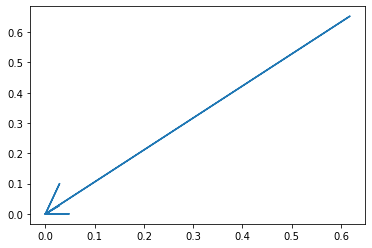

In [143]:
import matplotlib.pyplot as plt

x = FPR
y = TPR

# This is the ROC curve
plt.plot(x,y)
plt.show() 

# This is the AUC
auc = np.trapz(y,x)